In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn


In [2]:
df = pd.read_csv('C:\\Users\\prash\\Documents\\Downloads\\houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea","Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [4]:
for i in df.columns:
    print(f"column name {i} and unique values are {len(df[i].unique())}")

column name MSSubClass and unique values are 15
column name MSZoning and unique values are 5
column name LotFrontage and unique values are 110
column name LotArea and unique values are 869
column name Street and unique values are 2
column name LotShape and unique values are 4
column name YearBuilt and unique values are 112
column name 1stFlrSF and unique values are 678
column name 2ndFlrSF and unique values are 368
column name SalePrice and unique values are 597


In [5]:
import datetime
current_yr=datetime.datetime.now().year
df['Total_yr']= current_yr- df['YearBuilt']
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total_yr
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,21
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,48
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,23
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,109
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,24


In [6]:
df.drop('YearBuilt',axis=1,inplace=True)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total_yr'],
      dtype='object')

In [7]:
cat_features = ['MSSubClass','MSZoning','Street','LotShape']
out_features = 'SalePrice'

In [8]:
df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  80, 160,  75, 180,
        40,  85], dtype=int64)

In [9]:
from sklearn.preprocessing import LabelEncoder
lb_encoder={}
lb_encoder['MSubClass']=LabelEncoder()
lb_encoder['MSubClass'].fit_transform(df['MSSubClass'])

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [10]:
#  convert each cat_featurs to int
lb_encoder={}
for feature in cat_features:
    lb_encoder[feature]=LabelEncoder()
    df[feature]= lb_encoder[feature].fit_transform(df[feature])

In [11]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total_yr
0,5,3,65.0,8450,1,3,856,854,208500,21
1,0,3,80.0,9600,1,3,1262,0,181500,48
2,5,3,68.0,11250,1,0,920,866,223500,23
3,6,3,60.0,9550,1,0,961,756,140000,109
4,5,3,84.0,14260,1,0,1145,1053,250000,24
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,25
1456,0,3,85.0,13175,1,3,2073,0,210000,46
1457,6,3,66.0,9042,1,3,1188,1152,266500,83
1458,0,3,68.0,9717,1,3,1078,0,142125,74


In [12]:
# stacking and converting into Tensors
cat_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

In [13]:
### Convert numpy to Tensors
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [14]:
#### create continuous variable
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [15]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total_yr']

In [16]:
# stack in the contineous variables
cont_variables = np.stack([df[i].values for i in cont_features ],1)
cont_variables=torch.tensor(cont_variables,dtype=torch.float)
cont_variables

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [17]:
### Dependent Feature  their we need the 2D tensor for which we can done it by as shape -1,1
depend=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
depend

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

# Embedding size for categorical column
for this we have the the diff dimensions of the categorical column, also embbeding layer shows how many input layer should have and based on that how many outputs we create

In [18]:
len(df['MSSubClass'].unique())

15

In [19]:
#### Embedding Size For Categorical columns
cat_dims=[len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]
cat_dims

[15, 5, 2, 4]

In [20]:
# the output dimension should be based on the input dimension (min(50,feature_unique value/2))
embedding_dim= [(x, min(50,(x+1)//2)) for x in cat_dims]
embedding_dim # let's say(15,8) where 15 is input and 8 is output  

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [21]:
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [23]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [32]:
pd.set_option('display.max_rows', 300)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [35]:
embedding_val

[tensor([[ 2.3306,  0.5751,  0.4763,  ..., -0.7858,  1.1147, -0.8094],
         [ 0.8972, -0.1254, -0.7520,  ..., -0.0893, -0.8002,  0.3005],
         [ 2.3306,  0.5751,  0.4763,  ..., -0.7858,  1.1147, -0.8094],
         ...,
         [ 0.4401, -0.0597,  1.4173,  ...,  1.7322,  0.9695,  0.7355],
         [ 0.8972, -0.1254, -0.7520,  ..., -0.0893, -0.8002,  0.3005],
         [ 0.8972, -0.1254, -0.7520,  ..., -0.0893, -0.8002,  0.3005]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[-0.6453,  0.2455,  0.5817],
         [-0.6453,  0.2455,  0.5817],
         [-0.6453,  0.2455,  0.5817],
         ...,
         [-0.6453,  0.2455,  0.5817],
         [-0.6453,  0.2455,  0.5817],
         [-0.6453,  0.2455,  0.5817]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.3879],
         [-0.3879],
         [-0.3879],
         ...,
         [-0.3879],
         [-0.3879],
         [-0.3879]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.2248, -0.1233],
         [-0.2248, -0.1233],
         [ 0.8897,  1.

In [38]:
# For proper row orientation we can concate all the tensors in singleton form
z=torch.cat(embedding_val,1)
z

tensor([[ 2.3306,  0.5751,  0.4763,  ..., -0.3879, -0.2248, -0.1233],
        [ 0.8972, -0.1254, -0.7520,  ..., -0.3879, -0.2248, -0.1233],
        [ 2.3306,  0.5751,  0.4763,  ..., -0.3879,  0.8897,  1.1923],
        ...,
        [ 0.4401, -0.0597,  1.4173,  ..., -0.3879, -0.2248, -0.1233],
        [ 0.8972, -0.1254, -0.7520,  ..., -0.3879, -0.2248, -0.1233],
        [ 0.8972, -0.1254, -0.7520,  ..., -0.3879, -0.2248, -0.1233]],
       grad_fn=<CatBackward0>)

In [39]:
# inplement dropout
drop = nn.Dropout(p=0.5)
final_embed= drop(z)
final_embed

tensor([[ 4.6612,  1.1502,  0.9527,  ..., -0.0000, -0.0000, -0.0000],
        [ 1.7944, -0.2508, -0.0000,  ..., -0.0000, -0.0000, -0.2466],
        [ 4.6612,  0.0000,  0.0000,  ..., -0.0000,  0.0000,  2.3846],
        ...,
        [ 0.0000, -0.1194,  2.8345,  ..., -0.0000, -0.0000, -0.2466],
        [ 1.7944, -0.2508, -1.5039,  ..., -0.0000, -0.0000, -0.0000],
        [ 1.7944, -0.2508, -1.5039,  ..., -0.0000, -0.4495, -0.0000]],
       grad_fn=<MulBackward0>)

In [41]:
##### Create a Feed Forward Neural Network
class FeedForwardNN(nn.Module):
    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [42]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.5)
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.5, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [43]:
cont_variables

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [57]:
# train test split
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_variables[:batch_size-test_size]
test_cont=cont_variables[batch_size-test_size:batch_size]
y_train=depend[:batch_size-test_size]
y_test=depend[batch_size-test_size:batch_size]

In [58]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)


(1020, 180, 1020, 180, 1020, 180)

In [66]:
# trainig
epochs=5000
final_losses=[]
for i in range(epochs):
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%1000==1:
        print(f"Epoch number: {i} and the loss : {loss.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 168308.828125
Epoch number: 1001 and the loss : 125539.796875
Epoch number: 2001 and the loss : 80145.296875
Epoch number: 3001 and the loss : 44187.9296875
Epoch number: 4001 and the loss : 39275.984375


In [67]:
final_losses_numpy = [loss.detach().numpy() for loss in final_losses]

Text(0.5, 0, 'epoch')

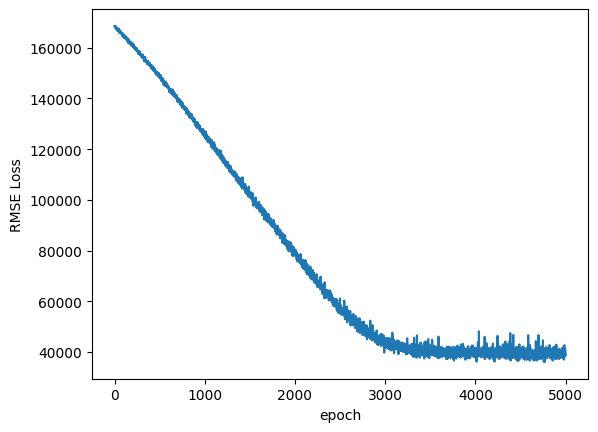

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses_numpy)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')

In [79]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print(f'RMSE: {loss}')

RMSE: 50817.3125.2f


In [74]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])
data_verify[:4]

,Test
0,130000.0
1,138887.0
2,175500.0
3,195000.0


In [81]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])
data_predicted[:4]

,Prediction
0,153658.125000
1,224667.093750
2,153347.734375
3,263176.093750


In [76]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,179186.875000,-49186.875000
1,138887.0,243856.375000,-104969.375000
2,175500.0,209351.343750,-33851.343750
3,195000.0,331357.218750,-136357.218750
4,142500.0,170819.015625,-28319.015625


# The advance house price prediction is complete.